# Game plan
### 1. Install and import Dependencies
### 2.  Load Models
### 3. Make Detections
### 4. Real time detections
### 5.Train from scratch
### 6.Load model

### 1. Install and Import Dependencies

In [ ]:
## Install pytorch
## https://pytorch.org/get-started/locally/

#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117

In [ ]:
##cloning the yolov5 ultralytics model'


#!git clone https://github.com/ultralytics/yolov5

In [ ]:
##go into the yolo v5 folder and install the requirements

#!cd yolov5 & pip install -r requirements.txt


In [ ]:
#Importing initial set of dependencies

In [1]:
import torch# will be used to load the yolo model and make the detections
from matplotlib import pyplot as plt #used for visualizing images
import numpy as np#used for array transformation
import cv2#helps access webcam and render feeds
import pandas

### 2. Load Models

In [2]:
#here we are using and loading a a pretrained ultralytics model from torch hub
# for reference https://pytorch.org/hub/ultralytics_yolov5/
#so there are the small,medum and large models here we'll be using the small models thus -->yolov5s
model=torch.hub.load('ultralytics/yolov5','yolov5s')

Using cache found in C:\Users\Ansel/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-4-3 Python-3.9.7 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [3]:

#shows the no of layers and activation functions its a massive NN config
model
#silu ->sigmoid linear unit

AutoShape(
  (model): DetectMultiBackend(
    (model): DetectionModel(
      (model): Sequential(
        (0): Conv(
          (conv): Conv2d(3, 32, kernel_size=(6, 6), stride=(2, 2), padding=(2, 2))
          (act): SiLU(inplace=True)
        )
        (1): Conv(
          (conv): Conv2d(32, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1))
          (act): SiLU(inplace=True)
        )
        (2): C3(
          (cv1): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv2): Conv(
            (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (cv3): Conv(
            (conv): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1))
            (act): SiLU(inplace=True)
          )
          (m): Sequential(
            (0): Bottleneck(
              (cv1): Conv(
                (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1))
  

### 3. Make Detections


In [4]:
#Baseline detections
#https://gist.github.com/AruniRC/7b3dadd004da04c80198557db5da4bda
#above link shows the classes which we are going to discuss and is detected by the model
img = 'https://ultralytics.com/images/zidane.jpg'# these images are based on the coco dataset

In [5]:
#passing the image to the model and printitng the results
results = model(img)
results.print()
#the image is 720*1280 and has detected 2 person with 2 ties

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1675.2ms pre-process, 175.7ms inference, 69.2ms NMS per image at shape (1, 3, 384, 640)


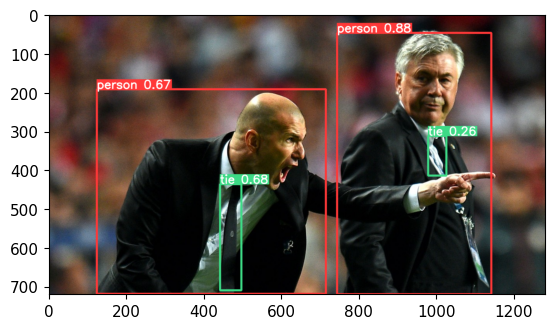

In [6]:
#ro get the rendered image
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [7]:
#we can also get the coordinates for our model
results.xyxy
#this shows the output from follo results
#xmin,ymin,xmax,ymax,confidence,class

[tensor([[7.43291e+02, 4.83438e+01, 1.14176e+03, 7.20000e+02, 8.79860e-01, 0.00000e+00],
         [4.41990e+02, 4.37337e+02, 4.96585e+02, 7.10036e+02, 6.75119e-01, 2.70000e+01],
         [1.23051e+02, 1.93238e+02, 7.14691e+02, 7.19771e+02, 6.66694e-01, 0.00000e+00],
         [9.78990e+02, 3.13579e+02, 1.02530e+03, 4.15526e+02, 2.61517e-01, 2.70000e+01]], device='cuda:0')]

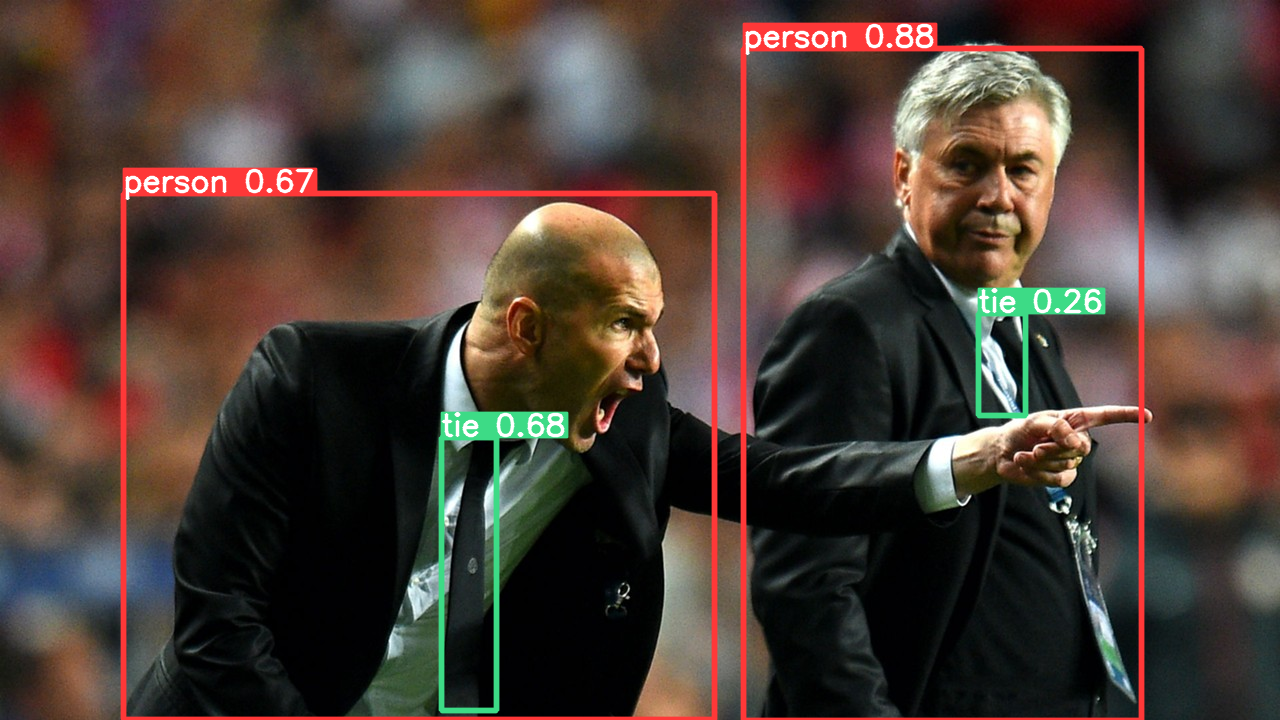

In [8]:
results.show()

In [9]:
#results.render()
##gives the matrix data of the img

In [10]:
np.array(results.render()).shape
#in order to display it in the image we need to make sure its a 3d
#so we need to do that we need to squueze the shape

(1, 720, 1280, 3)

In [11]:
np.squeeze(results.render()).shape

(720, 1280, 3)

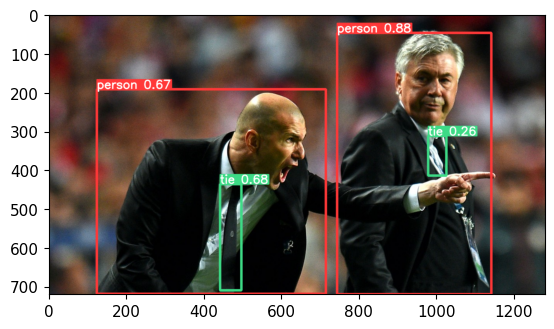

In [12]:
plt.imshow(np.squeeze(results.render()))

In [13]:
#lets look at a img of car traffic
img1 = 'https://c0.wallpaperflare.com/preview/657/21/278/road-city-busy-motorbike.jpg'
result1 = model(img1)
result1.print()

image 1/1: 607x910 3 persons, 19 cars, 6 motorcycles, 2 trucks
Speed: 1158.8ms pre-process, 134.0ms inference, 4.9ms NMS per image at shape (1, 3, 448, 640)


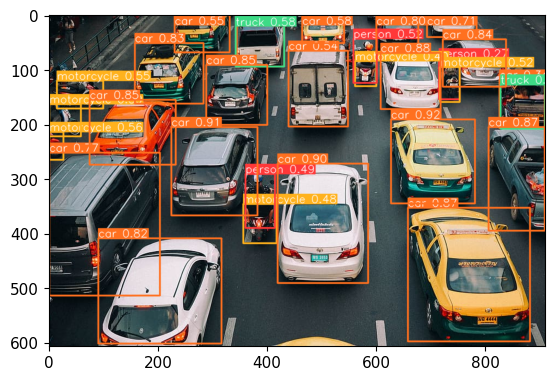

In [14]:
%matplotlib inline
plt.imshow(np.squeeze(result1.render()))
plt.show()

In [15]:
#results.render()#numpy output

### 4. Real time Detections

In [16]:
#code to access webcam and make real time detections

cap = cv2.VideoCapture(0)#we can change device by giving 1,2,3
while cap.isOpened():#looping through feed in webcam
    ret,frame = cap.read() # gets a return value and frame i.e image from webcam
    #cv2.imshow('YOLO',frame)# here when the web cam opens up we can see that the top we can see that the name is yolo in the top bar
    
    results =model(frame)#passing frame to yolo model in order to get detections
    #we need to pass the array repr. of the image  from result.render() method to a rendering function(cv2.imshow)
    #in order to get the output
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    #code below is used to exit out of this gracefully
    if cv2.waitKey(10) & 0xFF ==ord('q'):
        break
cap.release()#release our webcamq
cv2.destroyAllWindows()#destroy all our windows

#to quit out of the frame all  we need to do is press q
#we can alsodo this using a video also

### Implementation on a video

In [17]:
#implementation on a video

cap = cv2.VideoCapture('traffic.mp4')
while cap.isOpened():
    ret,frame = cap.read() 

    results =model(frame)
    cv2.imshow('YOLO',np.squeeze(results.render()))
    
    #code below is used to exit out of this gracefully
    if cv2.waitKey(10) & 0xFF ==ord('q'):
        break
cap.release()#release our webcamq
cv2.destroyAllWindows()#destroy all our windows

#to quit out of the frame all  we need to do is press q
#we can alsodo this using a video also

### 5.0 Train from Scratch

In [2]:
#Till now we were able to detect objects from the cocoa dataset now we'll train using custom training datasets like a drowsineess model
#so we need to collect some images and label them

import uuid #for creating a unique identifier for the image
import os #to have easy access to files 
import time #to set the time so that we have some time to collect each images that we collect 

In [20]:
#path and folders to which image is going to be saved
IMAGES_PATH = os.path.join('data','images')#mentioning the top fodler as data and subfolder as images like /data/images
#make sure to create a folder with data/images in the file directory
labels =['awake','drowsy']#we'll be having 2 cases awake and drowsy
number_imgs=20 #for each label we are going to collect 20 images

#so we'll loop through and collect image for awake and for drowsy
#and we'll label them using a package called label image


In [21]:
for label in labels:
    print(label)

awake
drowsy


In [22]:
for label in labels:
    print('collecting images for {}'.format(label))

collecting images for awake
collecting images for drowsy


In [28]:
#run code to understand the loop better
# for label in labels:#looping through labels
#     print('collecting images for {}'.format(labels))
#     for img_num in range(number_imgs):
#         print('collecting images for {}, image number {}'.format(label,img_num))#first print this 
# #         imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
# #         print(imgname)#print this second
        

In [31]:
print(os.path.join(IMAGES_PATH,labels[0]+'.'+str(uuid.uuid1())+'.jpg'))

data\images\awake.24f26f66-ee6b-11ed-b8d5-08719087c97b.jpg


In [35]:
#so here technically we are looping through the labels and for each label we'll be capturing the images 
#for each label we will wait for 5 seconds till image is captured

cap = cv2.VideoCapture(0)#capturing video
for label in labels:#looping through labels
    print('collecting images for {}'.format(labels))
    time.sleep(5)
    
    #loop through image range(20 images)
    for img_num in range(number_imgs):
        print('collecting images for {}, image number {}'.format(label,img_num))
        
        #capturing the image/webcam feed
        ret,frame = cap.read()
        
        #mentioning full filepath -> IMAGES_PATH and then we mention the name of the image
        #naming out image path
        imgname = os.path.join(IMAGES_PATH, label+'.'+str(uuid.uuid1())+'.jpg')
        
        #writes out image to file
        cv2.imwrite(imgname, frame)
        
        #render to the screen(showing the captured image)
        cv2.imshow('Image Collection',frame)
        
        #2 second delay between captures so that we can move around easily
        time.sleep(2)
        
  #for gracefully exiting        
        if cv2.waitKey(10) & 0xFF ==ord('q'):
            break
cap.release()#release our webcamq
cv2.destroyAllWindows()#destroy all our windows       
        
#after executing write images which 
#after running for the first time comment it out

collecting images for ['awake', 'drowsy']
collecting images for awake, image number 0
collecting images for awake, image number 1
collecting images for awake, image number 2
collecting images for awake, image number 3
collecting images for awake, image number 4
collecting images for awake, image number 5
collecting images for awake, image number 6
collecting images for awake, image number 7
collecting images for awake, image number 8
collecting images for awake, image number 9
collecting images for awake, image number 10
collecting images for awake, image number 11
collecting images for awake, image number 12
collecting images for awake, image number 13
collecting images for awake, image number 14
collecting images for awake, image number 15
collecting images for awake, image number 16
collecting images for awake, image number 17
collecting images for awake, image number 18
collecting images for awake, image number 19
collecting images for ['awake', 'drowsy']
collecting images for drow

## Installing the labelImage Library

In [36]:
#now the image is captured we need to do the image labelling
#go to the github link and clone the repo :-->https://github.com/heartexlabs/labelImg

In [38]:
#!git clone https://github.com/heartexlabs/labelImg
#after cloning we also need some additional modules

Cloning into 'labelImg'...


In [ ]:
# pyqt5 is a gui library and lxml is a dependency of pyqt5
#we are going into the cloned repo and applying the std installation code for the library

In [40]:
# !pip install pyqt5 lxml --upgrade 
# !cd labelImg && pyrcc5 -o libs/resources.py resources.qrc 


You should consider upgrading via the 'D:\DL\DrowsinessDetector\DrowsinessDetector\Scripts\python.exe -m pip install --upgrade pip' command.


In [ ]:
#inside our data folder we need to create another folder called labels where we earlier stored the images

#purpose is we are going to label the images and going to point the output to the labels file repository

### Now open the cmd in this path and create venv inside yolo folder

D:\DL\DrowsinessDetector>.\DrowsinessDetector\scripts\activate

(DrowsinessDetector) D:\DL\DrowsinessDetector>cd labelImg

(DrowsinessDetector) D:\DL\DrowsinessDetector\labelImg>python labelImg.py

this will open a prompt window refer 1.0_label_img.png


now open the directory in which the image is stored and we can move through

next we need to save the lablled img to folder so we need to click on the Change Save Dir and point it to the label folder that we earlier created

also make sure that the format is YOLO

-Once we select the image and save them we can save it and in the label folder we will have 2 files
first of which contains
1)awake.c85eaa0b-ee6c-11ed-bf5d-08719087c97b.txt

15 0.364063 0.461458 0.343750 0.564583

             -------->
the above are coordinates to which is a yolo format
the nos represent the (from left to right
-class number
-x centre coordinate
-y centre coordinate
-width
-height


2)classes.txt
in this file it represents the classes which labellimage have by default

dog
person
cat
tv
car
meatballs
marinara sauce
tomato soup
chicken noodle soup
french onion soup
chicken breast
ribs
pulled pork
hamburger
cavity
awake

once all the images are labelled as awake and drowsy we can close the labelimage window

now we can run our training command

In [8]:
# #for initial run try with 5 epochs

# !cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

# #also we may need to run it for 500 epochs to get a good model(might take 10-15 mins)
# #this code goes into the yolo5 and runs the train.py


train: weights=yolov5s.pt, cfg=, data=dataset.yml, hyp=data\hyps\hyp.scratch-low.yaml, epochs=500, batch_size=16, imgsz=320, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=2, project=runs\train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github:  YOLOv5 is out of date by 30 commits. Use 'git pull' or 'git clone https://github.com/ultralytics/yolov5' to update.
YOLOv5  v7.0-133-gcca5e21 Python-3.9.7 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0

In [ ]:
#after trainng we can also look a the end results- in the below folder
#D:\DL\DrowsinessDetector\yolov5\runs\train\exp

#we'll be able to see the weights which will be given as best.pt and last.pt

### loading and testing our model the model

#also reexecute the import once again in order to get the results

In [3]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp2/weights/last.pt', force_reload=True)
#here we are loading the model using pytorch
#force_reload makes sure we load the latest version of our model
#custom indicates that we are loading our custom model

#executed successfully

Downloading: "https://github.com/ultralytics/yolov5/zipball/master" to C:\Users\Ansel/.cache\torch\hub\master.zip
YOLOv5  2023-5-12 Python-3.9.7 torch-2.0.0+cu117 CUDA:0 (NVIDIA GeForce GTX 1050 Ti, 4096MiB)

Fusing layers... 
Model summary: 157 layers, 7055974 parameters, 0 gradients, 15.9 GFLOPs
Adding AutoShape... 


In [4]:
#giving path to one of our images
img = os.path.join('data', 'images', 'drowsy.f6dbaef9-ee6c-11ed-8281-08719087c97b.jpg')

In [5]:
results = model(img)

In [6]:
results.print()

image 1/1: 480x640 1 drowsy
Speed: 27.8ms pre-process, 36.0ms inference, 45.7ms NMS per image at shape (1, 3, 480, 640)


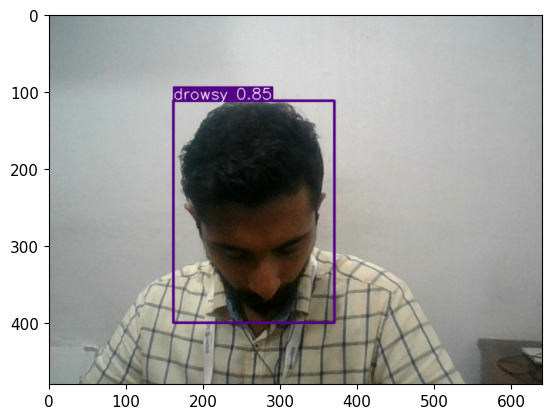

In [7]:
%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
##creating the attendance csv file

#createattendancecsv()

In [16]:
import csv
from datetime import datetime 
# Define the CSV file path
csv_file_path = 'Attendance.csv'

def createattendancecsv():
    csv_file_path = 'Attendance.csv'
    # Open the CSV file using a context manager
    with open(csv_file_path, 'w+', newline='') as file:
        # Check if the file is empty (new file)
        is_empty = file.read().strip() == ''

        # Create a CSV writer
        writer = csv.DictWriter(file, fieldnames=['Name', 'Time'])

        if is_empty:
            # Write the headers if the file is empty
            writer.writeheader()

def writename(i):
    with open(csv_file_path, 'r+', newline='') as file:        
            mydatalist = file.readlines()
            print(mydatalist)
            namelist=[]
            for line in mydatalist:
                entry = line.split(',')
                namelist.append(entry[0])
            if i not in namelist:
                now = datetime.now()
                time = now.strftime('%H:%M:%S')
                file.writelines(f'\n{i},{time}')
            else:
                pass

### real time detection of trained model

In [21]:
#checking output through frame
ls=[]
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    df = results.pandas().xyxy[0]
    for i in df['name']:
        writename(i)
            
#     print(ls)
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

#successfully working

['Name,Time\n', 'drowsy,11:06:10\n']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awak

['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,

['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,11:06:10\n', '\n', 'awake,11:07:01']
['Name,Time\n', 'drowsy,

[]
